# EDA sobre clientes de empresas de telecomunicaciones

In [344]:
# Librerias
import numpy as np
import pandas as pd

# limitar cantidad de decimales mostrados en el notebook
pd.set_option('display.precision', 2)

In [345]:
# carga de datos
df = pd.read_csv('./data/telecom_churn.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Significado de cada variable

- State: Abreviatura del estado
- Account length: Tiempo que lleva el cliente en la empresa
- Area code: Codigo de area
- International plan: El cliente cuenta con plan internacional
- Voice mail plan: El cliente cuenta con correo de voz
- Number vmail mesagges: Numero de mensajes de correo de voz
- Total day minutes: Duración total de las llamadas diurnas
- Total day calls: Número total de llamadas diurnas
- Total day charge: Cargo total por servicios diurnos
- Total eve minutes: Duración total de las llamadas en visperas
- Total eve calls: Número total de llamadas en visperas
- Total eve charge: Cargo total por servicios en visperas.
- Total night minutes: Duración total de las llamadas nocturnas
- Total night calls: Número total de llamadas nocturnas
- Total night charge: Cargo total por servicios nocturnos
- Total intl minutes: Duración total de las llamadas internacionales
- Total intl calls: Número total de llamadas internacionales
- Total intl charge: Cargo total por llamadas internacionales
- Customer service calls: Número de llamadas al servicio de atención al cliente
- Churn: Variable objetivo. La empresa retuvo o perdio al cliente

## Informacion basica del DataFrame

In [346]:
# dimensiones de los datos
df.shape

(3333, 20)

In [347]:
# mostrar todas las variables
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [348]:
# tipos de datos de cada variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

Vemos que todas las variables poseen la misma cantidad de registro que coincide con el total de registros del datasets. Esto indica que no hay valores faltantes.

## Cambiar tipo de dato de una variable

In [349]:
# convertir variable categorica a numerica
df['Churn'] = df['Churn'].astype('int64')

## Estadistica basica de las variables

In [350]:
# estadisticas basica de variables numericas
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,437.18,8.10,179.78,100.44,30.56,200.98,100.11,17.08,200.87,100.11,9.04,10.24,4.48,2.76,1.56,0.14
std,39.82,42.37,13.69,54.47,20.07,9.26,50.71,19.92,4.31,50.57,19.57,2.28,2.79,2.46,0.75,1.32,0.35
min,1.00,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00,0.00
25%,74.00,408.00,0.00,143.70,87.00,24.43,166.60,87.00,14.16,167.00,87.00,7.52,8.50,3.00,2.30,1.00,0.00
50%,101.00,415.00,0.00,179.40,101.00,30.50,201.40,100.00,17.12,201.20,100.00,9.05,10.30,4.00,2.78,1.00,0.00
75%,127.00,510.00,20.00,216.40,114.00,36.79,235.30,114.00,20.00,235.30,113.00,10.59,12.10,6.00,3.27,2.00,0.00
max,243.00,510.00,51.00,350.80,165.00,59.64,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00,1.00


In [351]:
# estadistica basica de variables categoricas y booleanas
df.describe(include=['object', 'bool'])

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


In [352]:
# conteo de valores para variables categoricas
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

2850 clientes son fieles a la empresa. 483 son probable que dejen la empresa

In [353]:
# mostrar proporcion de categorias en una variable categorica
df['Churn'].value_counts(normalize=True)

0    0.86
1    0.14
Name: Churn, dtype: float64

86% de los clientes son fieles a la empresa

## Ordenacion del DataFrame

In [354]:
# ordenar df segun una variable numerica
df.sort_values(by='Total day charge', ascending=False).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
365,CO,154,415,No,No,0,350.8,75,59.64,216.5,94,18.40,253.9,100,11.43,10.1,9,2.73,1,1
985,NY,64,415,Yes,No,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1
2594,OH,115,510,Yes,No,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1
156,OH,83,415,No,No,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1
605,MO,112,415,No,No,0,335.5,77,57.04,212.5,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1


Ordena los registros de mayor a menor segun los valores de *Total day charge*

In [355]:
# ordenar df segun varias variables
df.sort_values(by=['Churn', 'Total day charge'], ascending=[True, False]).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
688,MN,13,510,No,Yes,21,315.6,105,53.65,208.9,71,17.76,260.1,123,11.70,12.1,3,3.27,3,0
2259,NC,210,415,No,Yes,31,313.8,87,53.35,147.7,103,12.55,192.7,97,8.67,10.1,7,2.73,3,0
534,LA,67,510,No,No,0,310.4,97,52.77,66.5,123,5.65,246.5,99,11.09,9.2,10,2.48,4,0
575,SD,114,415,No,Yes,36,309.9,90,52.68,200.3,89,17.03,183.5,105,8.26,14.2,2,3.83,1,0
2858,AL,141,510,No,Yes,28,308.0,123,52.36,247.8,128,21.06,152.9,103,6.88,7.4,3,2.00,1,0


Ordena primero de menor a mayor los registros de acuerdo a los valores de *Churn* y luego continua la ordenacion por los valores de *Total day charge* esta vez de mayor a menor

## Indexacion y recuperacion de datos

**Cual es el porcentaje de usuarios que abandona la empresa?**

In [356]:
# Acceder a los valores de una sola columna
df['Churn'].mean()

0.14491449144914492

14.5% de los clientes abandonan la empresa, una cifra bastante alta lo que puede generar la quiebra de la misma

**Cual es el valor promedio de las variables numericas de los usuarios que abandonan la empresa?**

In [357]:
# Indexacion booleana: muestra aquellos registros que cumplen con una condicion en una variable dada
df[df['Churn'] == 1].mean()

/tmp/ipykernel_173/1851034119.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['Churn'] == 1].mean()


Account length            102.66
Area code                 437.82
Number vmail messages       5.12
Total day minutes         206.91
Total day calls           101.34
Total day charge           35.18
Total eve minutes         212.41
Total eve calls           100.56
Total eve charge           18.05
Total night minutes       205.23
Total night calls         100.40
Total night charge          9.24
Total intl minutes         10.70
Total intl calls            4.16
Total intl charge           2.89
Customer service calls      2.23
Churn                       1.00
dtype: float64

**Cuanto tiempo en promedio pasan hablando por telefono durante el dia los usuarios que abandonan?**

In [358]:
df[df['Churn'] == 1]['Total day minutes'].mean()

206.91407867494814

**Cual es la duracion maxima de las llamadas entre usuarios leales que no tienen un plan internacional?**

In [359]:
df[(df['Churn'] == 0) & (df['International plan'] == 'No')]['Total intl minutes'].max()

18.9

**Mostrar los registros con indice de 0 a 5 y los valores de las variables que estan entre State y Area code**

In [360]:
df.loc[0:5, 'State':'Area code']

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415
5,AL,118,510


**Mostrar los valores de los primeros 5 registros en las primeras 3 columnas**

In [361]:
df.iloc[0:5, 0:3]

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415


**Mostrar primer registro del dataframe**

In [362]:
df[:1]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0


**Mostrar ultimo registro del dataframe**

In [363]:
df[-1:]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.6,241.4,77,10.86,13.7,4,3.7,0,0


## Aplicar funciones a valores de filas y columnas

**Obtener el valor maximo de cada variable de dataframe**

In [364]:
df.apply(np.max)

State                        WY
Account length              243
Area code                   510
International plan          Yes
Voice mail plan             Yes
Number vmail messages        51
Total day minutes         350.8
Total day calls             165
Total day charge          59.64
Total eve minutes         363.7
Total eve calls             170
Total eve charge          30.91
Total night minutes       395.0
Total night calls           175
Total night charge        17.77
Total intl minutes         20.0
Total intl calls             20
Total intl charge           5.4
Customer service calls        9
Churn                         1
dtype: object

**Seleccionar todos los estados que comienzan con W**

In [365]:
df[df['State'].apply(lambda state: state[0] == 'W')].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
26,WY,57,408,No,Yes,39,213.0,115,36.21,191.1,112,16.24,182.7,115,8.22,9.5,3,2.57,0,0
44,WI,64,510,No,No,0,154.0,67,26.18,225.8,118,19.19,265.3,86,11.94,3.5,3,0.95,1,0
49,WY,97,415,No,Yes,24,133.2,135,22.64,217.2,58,18.46,70.6,79,3.18,11.0,3,2.97,1,0
54,WY,87,415,No,No,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,1


**Reemplazar los valores de Yes y No de la variable Internacional Plan por False y True**

In [366]:
sust = {'No':False, 'Yes':True}
df['International plan'] = df['International plan'].map(sust)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


**Reemplazar los valores Yes y No de la variable Voice mail plan por False y True respectivamente**

In [367]:
df = df.replace({'Voice mail plan': sust})
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


## Agrupacion

**Agrupar las variables segun los valores de Churn y mostrar estadistica de las variables Total day minutes, Total eve minutes,y Total night minutes**

In [368]:
columns_to_show = ['Total day minutes', 'Total eve minutes', 'Total night minutes']

df.groupby(['Churn'])[columns_to_show].describe(percentiles=[])

Total day minutes                                   Total eve minutes  \
                  count    mean    std  min    50%    max             count   
Churn                                                                         
0                2850.0  175.18  50.18  0.0  177.2  315.6            2850.0   
1                 483.0  206.91  69.00  0.0  217.6  350.8             483.0   

                                         Total night minutes                 \
         mean    std   min    50%    max               count    mean    std   
Churn                                                                         
0      199.04  50.29   0.0  199.6  361.8              2850.0  200.13  51.11   
1      212.41  51.73  70.9  211.3  363.7               483.0  205.23  47.13   

                            
        min     50%    max  
Churn                       
0      23.2  200.25  395.0  
1      47.4  204.80  354.9

**Hacer lo mismo pero pasando una lista de funciones a agg()**

In [369]:
df.groupby(['Churn'])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

Total day minutes                    Total eve minutes               \
                   mean    std amin   amax              mean    std  amin   
Churn                                                                       
0                175.18  50.18  0.0  315.6            199.04  50.29   0.0   
1                206.91  69.00  0.0  350.8            212.41  51.73  70.9   

             Total night minutes                      
        amax                mean    std  amin   amax  
Churn                                                 
0      361.8              200.13  51.11  23.2  395.0  
1      363.7              205.23  47.13  47.4  354.9

## Tablas Resumen

**Mostrar como se distribuyen las observaciones de la muestra en el contexto de las variables Churn e International plan**

In [370]:
# tabla de contingencia
pd.crosstab(df['Churn'], df['International plan'])

International plan,False,True
Churn,,
0,2664,186
1,346,137


Vemos que la mayoria de clientes fieles no utilizan un plan internacional.

**Mostrar como se distribuyen las observaciones de la muestra en el contexto de las variables Chun y Voice mail plan**

In [371]:
# Resultados en porcentajes
pd.crosstab(df['Churn'], df['Voice mail plan'], normalize=True)

Voice mail plan,False,True
Churn,,
0,0.60,0.25
1,0.12,0.02


**Mostrar el promedio de llamadas diurnas, vespertinas y nocturnas por codigo de area**

In [372]:
df.pivot_table(
    ['Total day calls', 'Total eve calls', 'Total night calls'], # lista de valores para calcular estadisticas
    ['Area code'],  # lista de variables para agrupar los datos
    aggfunc='mean'  # estadistico a calcular
)

,Total day calls,Total eve calls,Total night calls
Area code,,,
408,100.50,99.79,99.04
415,100.58,100.50,100.40
510,100.10,99.67,100.60


## Transformacion de DataFrame

**Calcular el numero total de llamadas para todos los usuarios y agregarla al dataframe**

In [373]:
# sumar todas las llamadas
total_calls = (
    df['Total day calls']
    + df['Total eve calls']
    + df['Total night calls']
    + df['Total intl calls']
)

# Agregar nueva columna al df
df.insert(loc=len(df.columns), column='Total calls', value=total_calls)
# loc indica el numero de columnas despues de las cuales insertar el objeto Serie

In [374]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,303
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,332
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,333
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,255
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,359


**Calcular el total de cargos para cada cliente y agregarlo al dataframe**

In [375]:
df['Total Charge'] = (
    df['Total day charge']
    + df['Total eve charge']
    + df['Total night charge']
    + df['Total intl charge']
)

df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls,Total Charge
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,0,303,75.56
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,0,332,59.24
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,0,333,62.29
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,0,255,66.80
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,0,359,52.09


## Eliminar columnas

**Eliminar ultimas variables creadas**

In [376]:
df.drop(['Total calls', 'Total Charge'], axis=1, inplace=True)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


**Eliminar registros**

In [377]:
df.drop([1,2]).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,AL,118,510,True,False,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,MA,121,510,False,True,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


## EDA Basico

**Como se relaciona la Churn con el International plan**

In [378]:
# tabla de contingencia
pd.crosstab(df['Churn'], df['International plan'], margins=True)

International plan,False,True,All
Churn,,,
0,2664,186,2850
1,346,137,483
All,3010,323,3333


In [379]:
# configuracion para las graficas
import matplotlib.pyplot as plt
import seaborn as sns

# formato de graficos
%config InlineBackend.figure_format = 'retina'

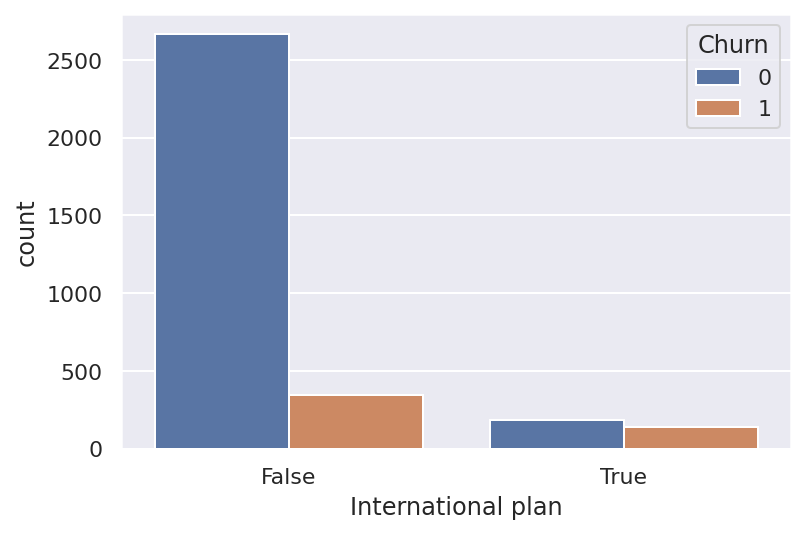

In [380]:
# Grafico de barra
sns.countplot(x='International plan', hue='Churn', data=df);

Vemos que con plan internacional, la tasa de abandono es mucho mayor comparado con los que permanecen. Esto puede deberse a los gastos elevados y mal administrados de las llamadas internacionales provoquen insatisfaccion en los clientes

**Como se relaciona Churn con Customer service calls**

In [381]:
pd.crosstab(df['Churn'], df['Customer service calls'], margins=True)

Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


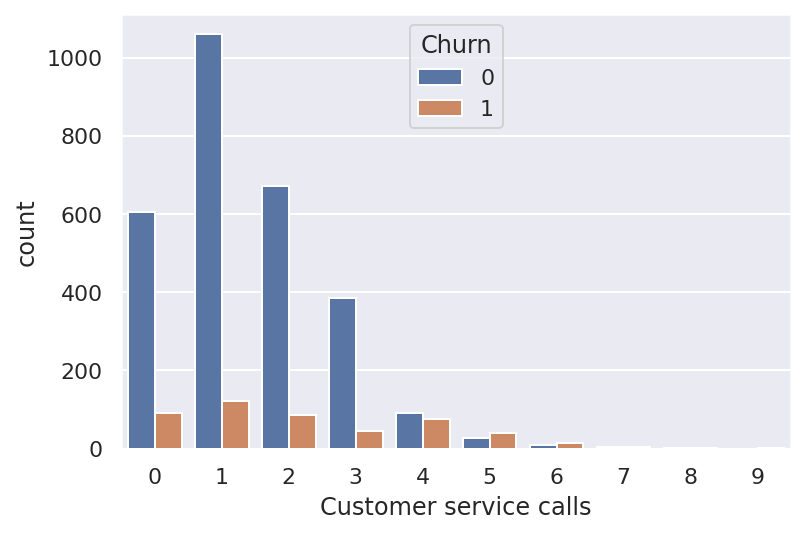

In [382]:
sns.countplot(x='Customer service calls', hue='Churn', data=df);

Vemos que la tasa de abandono aumenta considerablemente a partir de 4 llamadas de servicio al cliente.

**Analisis de Customer service calls para mas de 3 llamadas**

In [383]:
# creamos una nueva variable en el df con los datos de Customer mayores a 3 llamadas
df['Many_service_calls'] = (df['Customer service calls'] > 3).astype(int)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Many_service_calls
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0


In [384]:
# tabla de contingencia
pd.crosstab(df['Many_service_calls'], df['Churn'], margins=True)

Churn,0,1,All
Many_service_calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


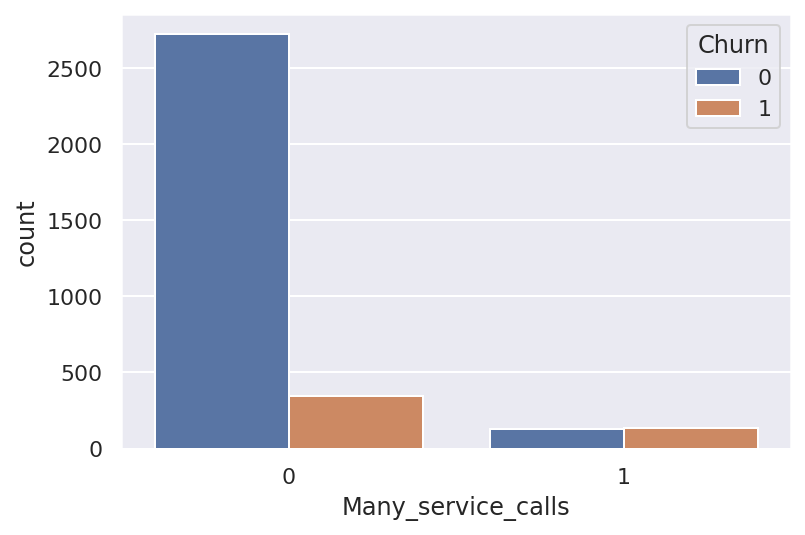

In [385]:
# grafico
sns.countplot(x='Many_service_calls', hue='Churn', data=df);

Vemos que los clientes que realizan mas de 3 llamadas tienden a abandonar la empresa.

**Relacion entre Churn tanto con el International plan como con Many_service_calls**

In [386]:
pd.crosstab(df['Many_service_calls'] & df['International plan'], df['Churn'])

Churn,0,1
row_0,,
False,2841,464
True,9,19


Para predecir que un cliente abandonara la empresa en el caso que el numero de llamadas al centro de servicios sea mayor a 3 y se agregue un plan internacional, podriamos esperar una precision del 83.4% ya que nos equivocamos 464 + 9 veces. Esto porcentaje se obtiene de la siguiente manera:  

In [387]:
verdadero_positivo = 2841 + 19
falso_positivo = 464 + 9
pct_accuracy = 1 - (falso_positivo/verdadero_positivo)
pct_accuracy

0.8346153846153846

## Ubicacion de los datos

In [388]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Many_service_calls
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0


Analicemos la ubicacion de los valores del total de minutos por dia

In [389]:
# Media
Mean_Total_day_minutes = df['Total day minutes'].mean()
Mean_Total_day_minutes

179.77509750975116

In [390]:
# Media truncada
from scipy.stats import trim_mean

MedianT_Total_day_minutes = trim_mean(df['Total day minutes'], 0.1)
MedianT_Total_day_minutes

179.8453693288339

In [391]:
# Mediana
Median_Total_day_minutes = df['Total day minutes'].median()
Median_Total_day_minutes

179.4

In [392]:
# df de comparacion de los resultados
V_location = {
    'Media del total de minutos por dia':[Mean_Total_day_minutes],
    'Media recortada del total de minutos por dia':[MedianT_Total_day_minutes],
    'Mediana del total de minutos por dia':[Median_Total_day_minutes]
}

df_location = pd.DataFrame(V_location)
df_location

,Media del total de minutos por dia,Media recortada del total de minutos por dia,Mediana del total de minutos por dia
0,179.78,179.85,179.4


Los resultados, al ser similares, indican que los valores no se ven afectados por outliers

## Variabilidad de los datos

In [393]:
# Desviacion standar
std_Total_day_minutes = df['Total day minutes'].std()
std_Total_day_minutes

54.46738920237142

In [394]:
# IQR
IQR_Total_day_minutes = df['Total day minutes'].quantile(0.75) - df['Total day minutes'].quantile(0.25)
IQR_Total_day_minutes

72.70000000000002

In [395]:
# MAD
from statsmodels import robust

MAD_Total_day_minutes = robust.scale.mad(df['Total day minutes'])
MAD_Total_day_minutes

53.81846053175337

In [396]:
# df con los resultados
V_variability = {
    'std del total de minutos por dia':[std_Total_day_minutes],
    'IQR del total de minutos por dia':[IQR_Total_day_minutes],
    'MAD del total de minutos por dia':[MAD_Total_day_minutes]
}

df_variability= pd.DataFrame(V_variability)
df_variability

,std del total de minutos por dia,IQR del total de minutos por dia,MAD del total de minutos por dia
0,54.47,72.7,53.82


La similitud entre la desviacion estandar y MAD corrobora que los datos no presentan outliers

# Analisis Visual de los datos numericos

In [397]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Many_service_calls
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0


In [398]:
# configura la apariencia de las graficas utilizando el estilo de Seaborn predeterminado
sns.set()  

# configura las imagenes generadas por matplotlib para que sean en formato SVG 
%config InlineBackend.figure_format = 'svg'

## Histograma

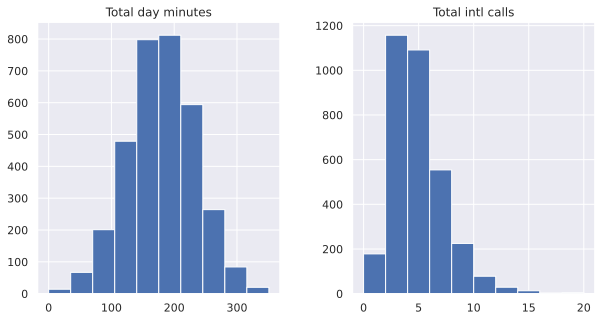

In [399]:
# seleccion de variables numericas a analizar
# trabajamos con Total de minutos diurnos y Total de llamadas internacionales
features = ['Total day minutes', 'Total intl calls']

# histograma con malla
df[features].hist(figsize=(10,5));

- La variable Total day minutes se distribuye normalmente
- La variable Total intl calls esta notablemente sesgada hacia la derecha, es decir, su cola es mas larga hacia la derecha.

## Grafico de Densidad

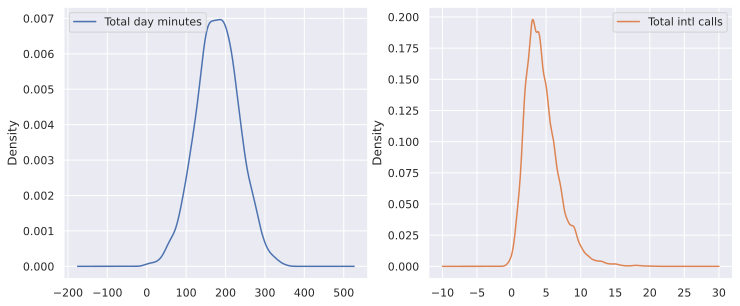

In [400]:
df[features].plot(
    kind='density', # grafico de densidad
    subplots=True,  # crear subgrafico para cada variable pasada
    layout=(1,2),   # posicion de los graficos. 1 fila, 2 columnas 
    sharex=False,   # controla si los graficos comparten el mismo eje x
    figsize=(12,5)  # tamano de la figura
);

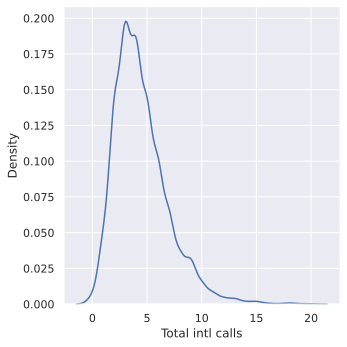

In [401]:
# Grafico de Densidad con Seaborn
sns.displot(df['Total intl calls'], kind='kde');

## Diagrama de caja

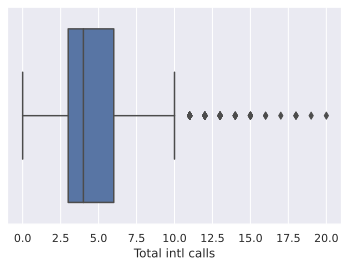

In [402]:
# diagrama de caja para el total de llamadas internacionales
sns.boxplot(x='Total intl calls', data=df);

- La mediana es de aproximadamente 3.5
- Hay muchos valores atipicos con valores mayor a 10

## Grafico de Violin

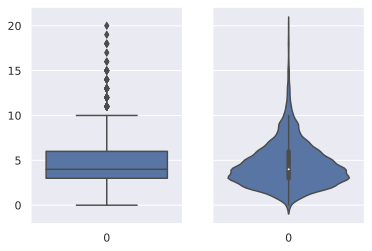

In [403]:
# diagrama de caja y de violin para la variable Total de llamadas internacionales
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6,4))
sns.boxplot(data=df['Total intl calls'], ax=axes[0])
sns.violinplot(data=df['Total intl calls'], ax=axes[1]);

- El diagrama de caja muestra ciertas estadisticas relativas de una variable
- El grafico de violin se concentra en mostrar la ditribucion suavizada de los datos.

## Estadistica Descriptiva

In [404]:
df[features].describe()

,Total day minutes,Total intl calls
count,3333.00,3333.00
mean,179.78,4.48
std,54.47,2.46
min,0.00,0.00
25%,143.70,3.00
50%,179.40,4.00
75%,216.40,6.00
max,350.80,20.00


# Analisis Visual de datos categoricos

## Tabla de Frecuencia

Comprobemos el equilibrio de clases en nuestra variable objetivo

In [405]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

Vemos que los datos no estan equilibrados, es decir, los clientes leales y desleales nos estan representados por igual en el conjunto de datos. Solo una pequeña cantidad de clientes cancelo su suscripcion al servicio de telecomunicaciones.

Este hecho puede implicar algunas restricciones a la hora de medir el rendimiento de la clasificacion

## Diagrama de barra

Tracemos el diagrama de barra para las variables **Churn** y **Customer service calls**

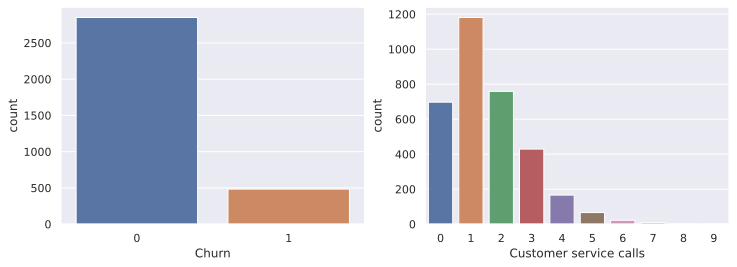

In [406]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

sns.countplot(x='Churn', data=df, ax=axes[0])
sns.countplot(x='Customer service calls', data=df, ax=axes[1]);

- el grafico de la izquierda evidencia el desequilibrio de la variable objetivo.
- El grafico de la derecha da una pista de que la mayoria de los clientes resuelven sus problemas en un maximo de 2 o 3 llamadas.

Como estamos interesados en el comportamiento de los clientes insatisfechos entonces puede ser que la cola de ese grafico de barras contenga la mayor parte de los clientes de nuestro interes

# Visualizacion Multivariable (Cuantitativa vs Cuantitativa)

## Matriz de correlacion

Muestra la correlacion entre variables cuantitativas

In [407]:
# listar solo variables numericas del dataframe
numerical = list(
    set(df.columns)  - set([
        'State',
        'International plan',
        'Voice mail plan',
        'Area code',
        'Churn',
        'Customer service calls'
    ])
)

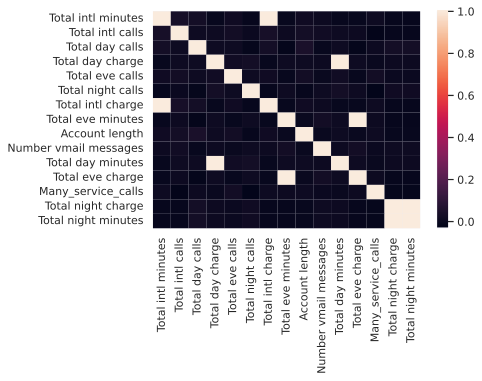

In [408]:
# matriz de correlacion en un heatmap
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);

Vemos que hay 4 variables que se calculan directamente de la cantidad de minutos dedicados a las llamadas telefonicas: Total day charge, Total even charge, Total night charge y Total intl charge. Son variables dependientes por lo que pueden omitirse ya que no aportan informacion

In [409]:
numerical = list(
    set(numerical) - set([
        'Total day charge',
        'Total eve charge',
        'Total night charge',
        'Total intl charge'
    ])
)

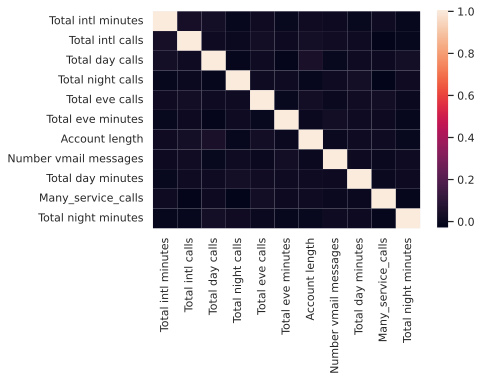

In [410]:
# matriz de correlacion en un heatmap
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);

## Grafico de correlacion

Muestra la relacion entre dos variables cuantitativas

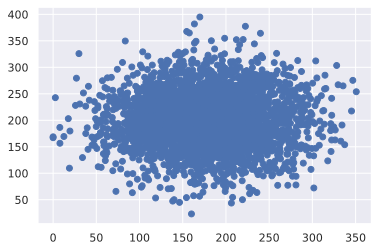

In [411]:
# scatterplot de Total day minutes y Total night minutes
plt.scatter(df['Total day minutes'], df['Total night minutes']);

Vemos que las variables no estan correlacionadas: la forma de elipse es alineada con los ejes

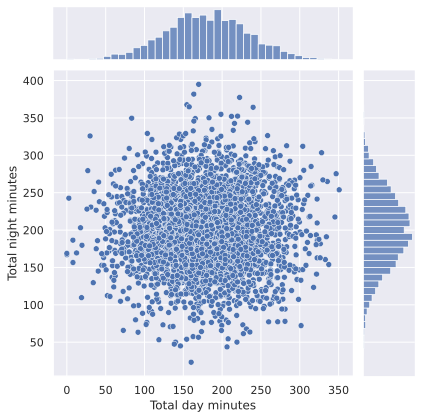

In [412]:
# diagrama de dispersion con seaborn
sns.jointplot(x='Total day minutes', y='Total night minutes', data=df, kind='scatter');

## Grafico de Contorno

Muestra la relacion entre dos variables mediante densidades

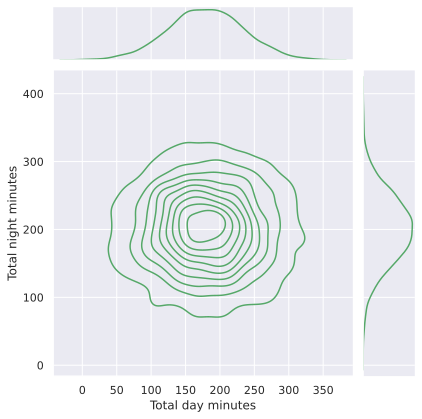

In [413]:
sns.jointplot(
    x='Total day minutes',
    y='Total night minutes',
    data=df,
    kind='kde',
    color='g'
);

## Matriz de diagrama de dispersion

Muestra el diagrama de dispersion de todas las variables entre si.

In [414]:
# Pasamos al formato png ya que en svg puede tardar mucho en correr
%config InlineBackend.figure_format = 'png'

In [415]:
#sns.pairplot(df[numerical]);

# Visualizacion multivariable (Cuantitativa vs Cualitativa)

## Grafico de dispersion de 3 variables

Muestra como interactua las variables numericas con una variable categorica, en este caso nuestra variable objetivo

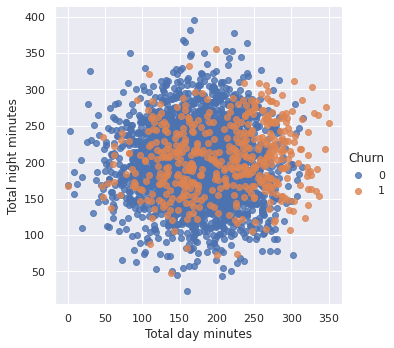

In [416]:
sns.lmplot(
    x='Total day minutes',
    y='Total night minutes',
    data=df,
    hue='Churn',
    fit_reg=False
);

De la grafica vemos que gran parte de los clientes que abandonan se inclinan hacia la parte superior derecha, es decir, estos clientes parece que tienden a pasar mas tiempo hablando por telefono tanto de dia como de noche

## Matriz de diagramas de caja

Permiten visualizar la distribucion de variables numericas en dos grupos separados

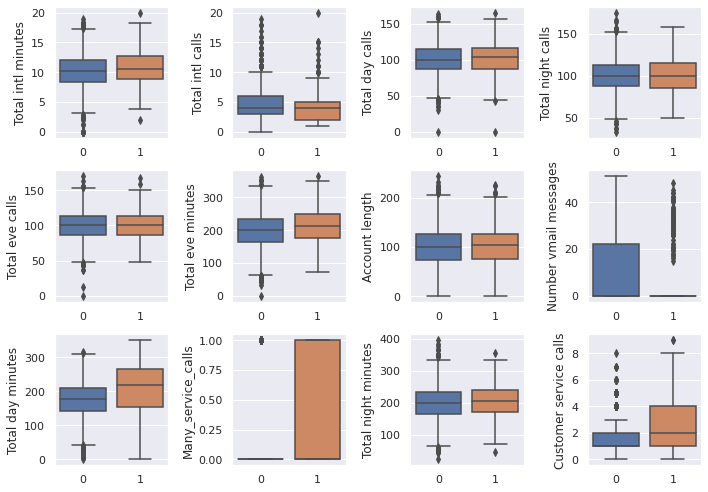

In [417]:
# analizamos la variable churn, que es categorica, como numerica

# agregamos a la lista de variables numericas la variable Customer service calls
numerical.append('Customer service calls')

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx/4), idx%4]
    sns.boxplot(x='Churn', y=feat, data=df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout();

Vemos que la mayor discrepancia entre los dos grupos se da en tres variables: Total day minutes, Customer sevice calls y Number vmail messages.

## Diagrama de Violin entre variable categorica y numerica

Muestra la distribucion de la variable numerica organizada en dos grupos. Si se compara con un diagrama de caja podemos obtener informacion estadistica adicional

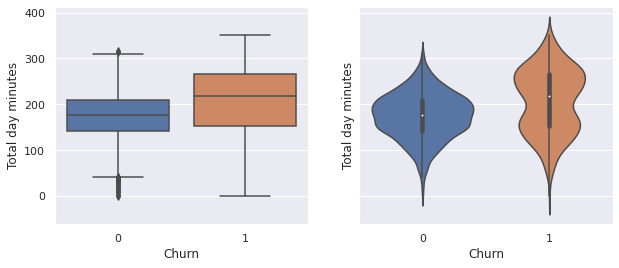

In [418]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10,4))
sns.boxplot(x='Churn', y='Total day minutes', data=df, ax=axes[0])
sns.violinplot(x='Churn', y='Total day minutes', data=df,ax=axes[1]);

De los graficos vemos que los clientes que abandonan la empresa, tienden a hablas mas por telefono.

Hasta ahora podemos concluir que los clientes que abandonan sus contratos son los usuarios mas activos de los servicios de comunicacion. Quizas no esten contentos con las tarifas por lo que una posible medida para evitar la desercion podria ser la reduccion en las tarifas de las llamadas.

## Visualizacion de variable numerica en dos categoricas

Permite analizar una variable cuantitativa en dos dimensiones categoricas

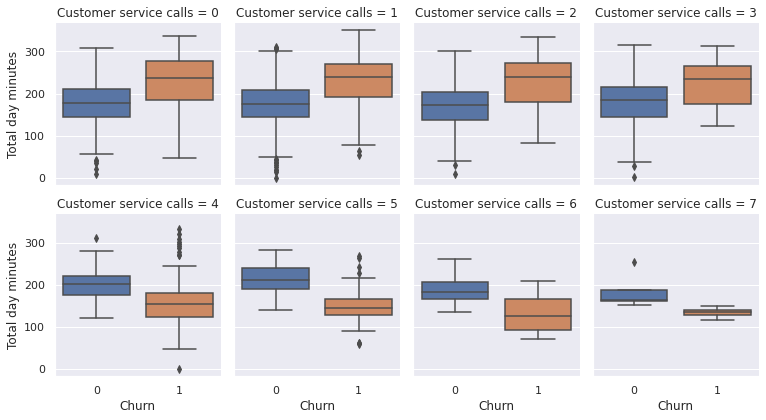

In [419]:
# visualizacion del Total day minutes con churn y Customer service calls

sns.catplot(
    x='Churn',
    y='Total day minutes',
    col='Customer service calls',
    data=df[df['Customer service calls'] < 8], #cantidad de llamadas al servicio al cliente menores a 8
    kind='box',
    col_wrap=4,  # numero de columnas para agrupar los subgraficos
    height=3,    # altura de cada subgrafico en pulgadas
    aspect=0.9   # relacion de aspecto de los subgraficos. Menor a 1 hace que los subgraficos sean mas ancho que altos
);


Vemos que a partir de 4 llamadas, es posible que los minutos totales del día ya no sean el factor principal de pérdida de clientes. Quizás, además de nuestra suposición anterior sobre las tarifas, hay clientes que no están satisfechos con el servicio debido a otros problemas, lo que podría llevar a una menor cantidad de minutos diarios dedicados a llamadas.

# Visualizacion Multivariable (Categorica vs Categorica)

## Grafico de Conteo

Permite contrastar dos variables categoricas. Toma la variable ordinal, cuenta los valores por cada grupo y los muestras en dos barras para cada valor ordinal

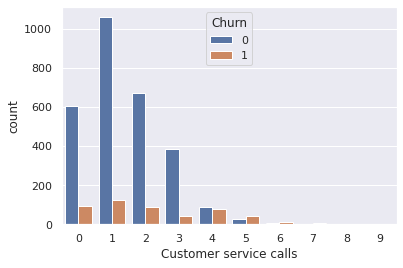

In [420]:
# Vamos a contrastar las variables Customer service calls con Churn

sns.countplot(x='Customer service calls', hue='Churn', data=df);

Notamos que la tasa de abondono aumenta significativamente a partir de 4 o mas llamadas al servicio de atencion al cliente

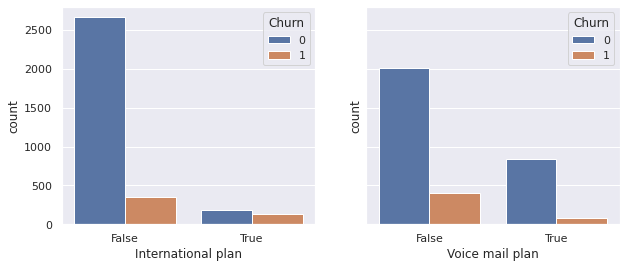

In [421]:
# Contrastar Churn con International plan y Voice vmail plan

_, axes = plt.subplots(1, 2, sharey=True, figsize=(10,4))

sns.countplot(x='International plan', hue='Churn', data=df, ax=axes[0])
sns.countplot(x='Voice mail plan', hue='Churn', data=df, ax=axes[1]);

Cuando el cliente tiene habilitado un plan internacional, la tasa de abandono es mucho mayor lo que indica que es una caracteristica fuerte para predecir Churn. No se observa lo mismo con un plan de correo de voz 

## Tabla de Contingencia

Muestra la distribuciond de frecuencia multivariada de variables categoricas en forma tabular. Nos permite ver la distribucion de una variable condicionada a otra, observando sus valores. 

In [422]:
# relacion de Churn con State
pd.crosstab(df['State'], df['Churn']).T

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Churn,,,,,,,,,,,,,,,,,,,,,
0,49,72,44,60,25,57,62,49,52,55,...,52,48,54,62,72,65,52,71,96,68
1,3,8,11,4,9,9,12,5,9,8,...,8,5,18,10,5,8,14,7,10,9


In [423]:
# Calculo de la tasa de abandono para cada estado, de mayor a menor
df.groupby(['State'])['Churn'].agg([np.mean]).sort_values(by='mean', ascending=False).T

State,NJ,CA,TX,MD,SC,MI,MS,NV,WA,ME,...,RI,WI,IL,NE,LA,IA,VA,AZ,AK,HI
mean,0.26,0.26,0.25,0.24,0.23,0.22,0.22,0.21,0.21,0.21,...,0.09,0.09,0.09,0.08,0.08,0.07,0.06,0.06,0.06,0.06


Parece que la tasa de abandono en NJ y CA esta por encima del 25% y en menos del 6% para AK y HI. Sin embaro, estas conclusiones estan basadas en muy pocos ejemplosc por lo que esta observacion podria ser una propiedad del conjunto de datos en particular

# Visualizacion del conjunto de datos en general

Cuando la cantidad de variables es lo suficientemente alta, el tipo de análisis visual anterior rápidamente se vuelve lento e ineficiente. Además, seguiríamos analizando nuestras variables por pares, no todas a la vez.

Entonces como mostrar todas las variables y aun asi poder interpretar la visualizacion resultante? Para ello existen diferentes tecnicas como:

- **Reduccion de dimensionalidad**: consiste en disminuir la cantidad de variables utilizadas en la visualización sin perder mucha información sobre los datos. Cada variable puede considerarse como una dimensión en el espacio de puntos de datos. Uno de los métodos de reducción de dimensionalidad más conocidos es el Análisis de Componentes Principales (PCA). Su limitacion es que es lineal lo que implica ciertas restricciones sobre los datos.

- **T- SNE**: Introduccion de vecinos estocasticos distribuidos en t. Su idea básica es simple: encontrar una proyección para un espacio de características de alta dimensión en un plano (o un hiperplano 3D, pero casi siempre es 2D) tal que aquellos puntos que estaban muy separados en el espacio n-dimensional inicial terminarán muy separados. Aquellos que originalmente estaban cerca permanecerían cerca unos de otros. La incrustación de vecinos es una búsqueda de una representación de datos nueva y menos dimensional que preserve la vecindad de los ejemplos.

## Aplicacion de T-SNE

In [424]:
# importat librerias
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [425]:
# omitir State y Churn del dataframe
X = df.drop(['Churn', 'State'], axis=1)
X.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Many_service_calls
0,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [426]:
# Convertir en 0 y 1 los valores de aquellas variables binarias
X['International plan'] = X['International plan'].map({True:1, False:0})
X['Voice mail plan'] = X['Voice mail plan'].map({True:1, False:0})
X.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Many_service_calls
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [433]:
# normalizar los datos
# restar la media de cada variable y dividir por su respectivs desviacion estandar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [435]:
# crear una representacion de T-SNE
tsne = TSNE(random_state=17)
%time tsne_repr = tsne.fit_transform(X_scaled)

/home/jbernal/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/jbernal/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


CPU times: user 1min 6s, sys: 773 ms, total: 1min 7s
Wall time: 17.1 s


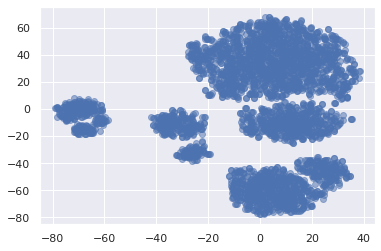

In [439]:
# graficamos t-sne
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=0.5);

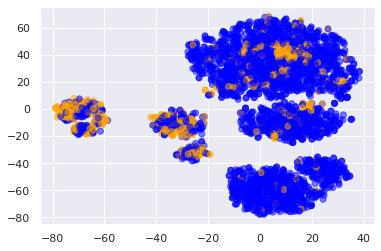

In [442]:
# coloreamos el t-sne segun los clientes fieles y los que abandonan
plt.scatter(
    tsne_repr[:, 0],
    tsne_repr[:, 1],
    c=df['Churn'].map({0:'blue', 1:'orange'}),
    alpha=0.5
);

Vemos que los clientes que abandonan se concentran en unas pocas areas del espacio de caracteristicas de dimensiones inferiores

Vamos a colorear las demas variables binarias para comprender mejor la imagen

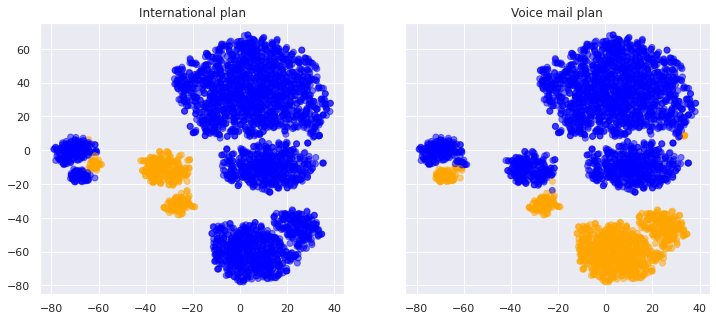

In [443]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12,5))

for i, name in enumerate(['International plan', 'Voice mail plan']):
    axes[i].scatter(
        tsne_repr[:, 0],
        tsne_repr[:, 1],
        c=df[name].map({True:'orange', False:'blue'}),
        alpha=0.5
    )
    axes[i].set_title(name);
    
    # naranja: casos positivos para la caracteristica binaria correspondiente

Muchos clientes insatisfechos que cancelaron su suscripcion se agrupan en grupo que representan las personas con plan internacional pero sin plan de correo de voz